### 01.Google Trend

In [ ]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

#### 1. 일본, 한국 화장품 검색어 트렌드

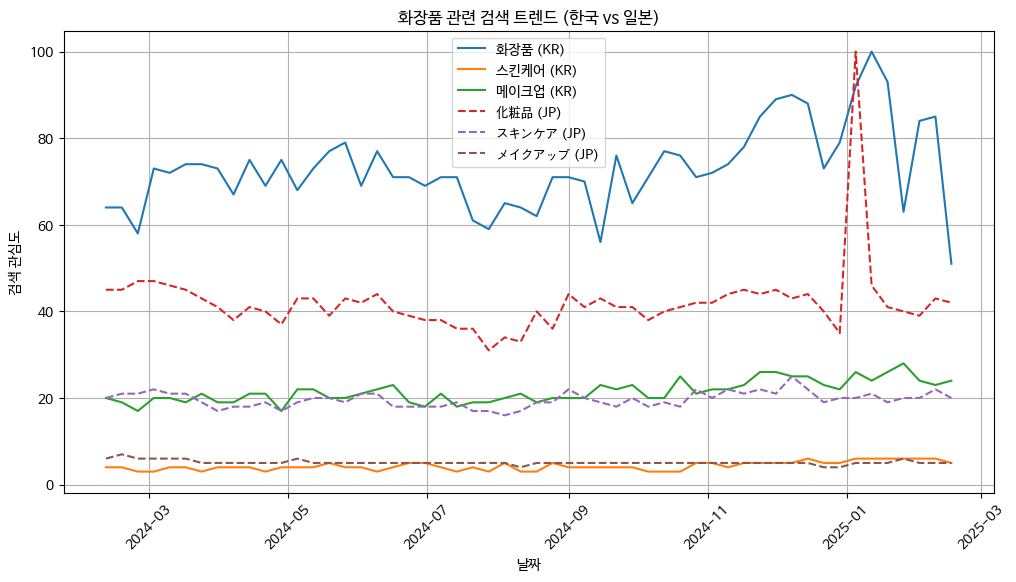

In [ ]:
# TrendReq 객체 생성
pytrends = TrendReq(hl='ko-KR', tz=540)  

# 분석할 키워드 목록
kw_kr_list = ["화장품", "스킨케어", "메이크업"]
kw_jp_list = ["化粧品", "スキンケア", "メイクアップ"]

# 한국(KR) 데이터 수집
pytrends.build_payload(kw_kr_list, cat=0, timeframe='today 12-m', geo='KR', gprop='')
kr_data = pytrends.interest_over_time()

# 일본(JP) 데이터 수집
pytrends.build_payload(kw_jp_list, cat=0, timeframe='today 12-m', geo='JP', gprop='')
jp_data = pytrends.interest_over_time()

# 데이터 시각화
plt.figure(figsize=(12, 6))
for kw in kw_kr_list:
    plt.plot(kr_data.index, kr_data[kw], label=f"{kw} (KR)", linestyle='solid')

for kw in kw_jp_list:
    plt.plot(jp_data.index, jp_data[kw], label=f"{kw} (JP)", linestyle='dashed')

plt.legend()
plt.title("화장품 관련 검색 트렌드 (한국 vs 일본)")
plt.xlabel("날짜")
plt.ylabel("검색 관심도")
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### 2. 한국 화장품 특정 키워드

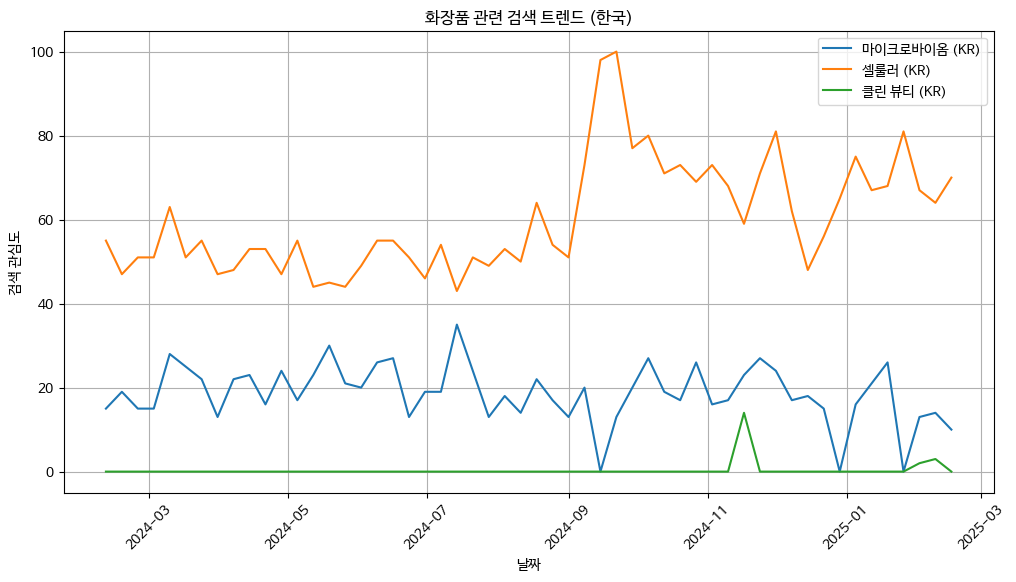

In [ ]:
# TrendReq 객체 생성
pytrends = TrendReq(hl='ko-KR', tz=540)  # 한국어 설정, 시간대는 일본/한국 공통 (UTC+9)

# 분석할 키워드 목록
kw_kr_list = ['마이크로바이옴', '셀룰러', '클린 뷰티']

# 한국(KR) 데이터 수집
pytrends.build_payload(kw_kr_list, cat=0, timeframe='today 12-m', geo='KR', gprop='')
kr_data = pytrends.interest_over_time()

# 데이터 시각화
plt.figure(figsize=(12, 6))
for kw in kw_kr_list:
    plt.plot(kr_data.index, kr_data[kw], label=f"{kw} (KR)", linestyle='solid')

plt.legend()
plt.title("화장품 관련 검색 트렌드 (한국)")
plt.xlabel("날짜")
plt.ylabel("검색 관심도")
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### 3. 한국 뷰티, 메이크업 구글 트렌드

In [ ]:
pytrends = TrendReq(hl="ko", tz=540)  # 한국어(ko) & 한국 시간대(UTC+9)

kw_list = ["뷰티", "메이크업"]  # 검색어 리스트

# 트렌드 데이터 요청 (5년간)
pytrends.build_payload(kw_list, cat=0, timeframe="today 5-y", geo="KR", gprop="")

# 데이터 가져오기
df = pytrends.interest_over_time()
print(df.head())  # 데이터 확인


            뷰티  메이크업  isPartial
date                           
2020-02-16  87    32      False
2020-02-23  74    24      False
2020-03-01  72    28      False
2020-03-08  82    28      False
2020-03-15  72    28      False


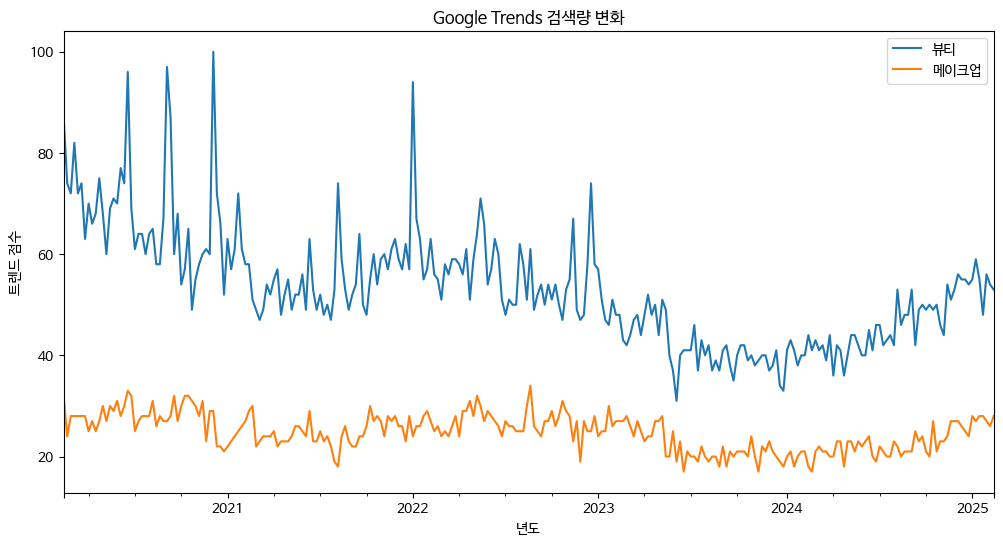

In [ ]:
df.drop(columns=["isPartial"], inplace=True) 
df.plot(figsize=(12,6), title="Google Trends 검색량 변화")
plt.xlabel("년도")
plt.ylabel("트렌드 점수")
plt.show()